In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from ta.trend import SMAIndicator, MACD
from ta.momentum import RSIIndicator
import pynance as pn

In [2]:
# Load data
df = pd.read_csv("../data/MSFT_historical_data.csv")

# Parse dates and sort
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

# Preview data
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0


In [3]:
#Calculate Technical Indicators (SMA, RSI, MACD)

# SMA
df["SMA_20"] = SMAIndicator(close=df["Close"], window=20).sma_indicator()
df["SMA_50"] = SMAIndicator(close=df["Close"], window=50).sma_indicator()

# RSI
df["RSI"] = RSIIndicator(close=df["Close"], window=14).rsi()

# MACD
macd = MACD(close=df["Close"])
df["MACD"] = macd.macd()
df["MACD_Signal"] = macd.macd_signal()
df["MACD_Diff"] = macd.macd_diff()

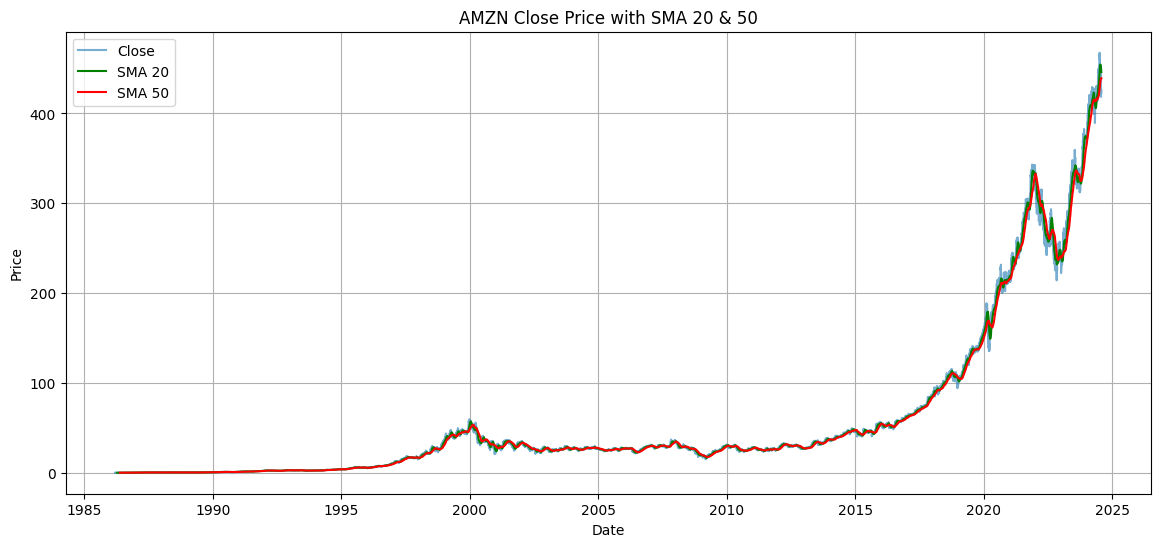

In [4]:
# Visualize Indicators
# Plot 1: Price + Moving Averages

plt.figure(figsize=(14, 6))
plt.plot(df["Date"], df["Close"], label="Close", alpha=0.6)
plt.plot(df["Date"], df["SMA_20"], label="SMA 20", color="green")
plt.plot(df["Date"], df["SMA_50"], label="SMA 50", color="red")
plt.title("AMZN Close Price with SMA 20 & 50")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

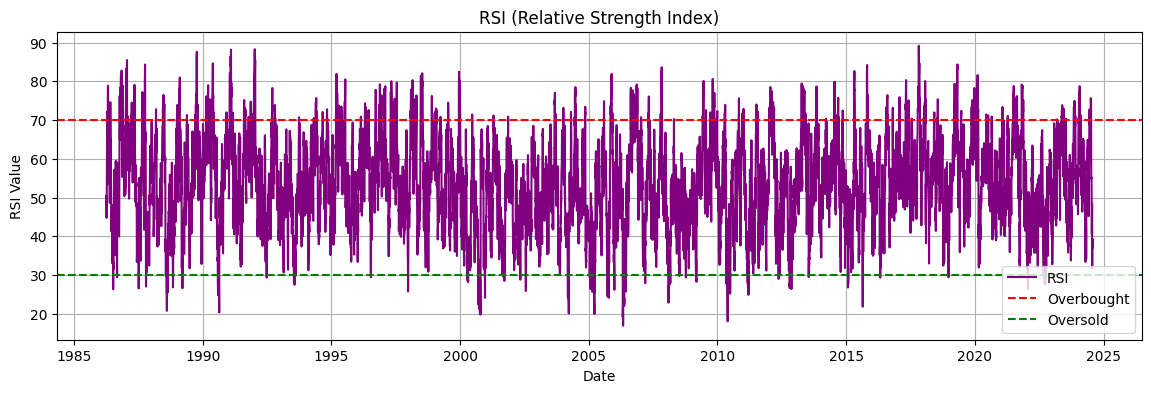

In [5]:
#RSI

plt.figure(figsize=(14, 4))
plt.plot(df["Date"], df["RSI"], label="RSI", color="purple")
plt.axhline(70, linestyle='--', color='red', label="Overbought")
plt.axhline(30, linestyle='--', color='green', label="Oversold")
plt.title("RSI (Relative Strength Index)")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.legend()
plt.grid(True)
plt.show()

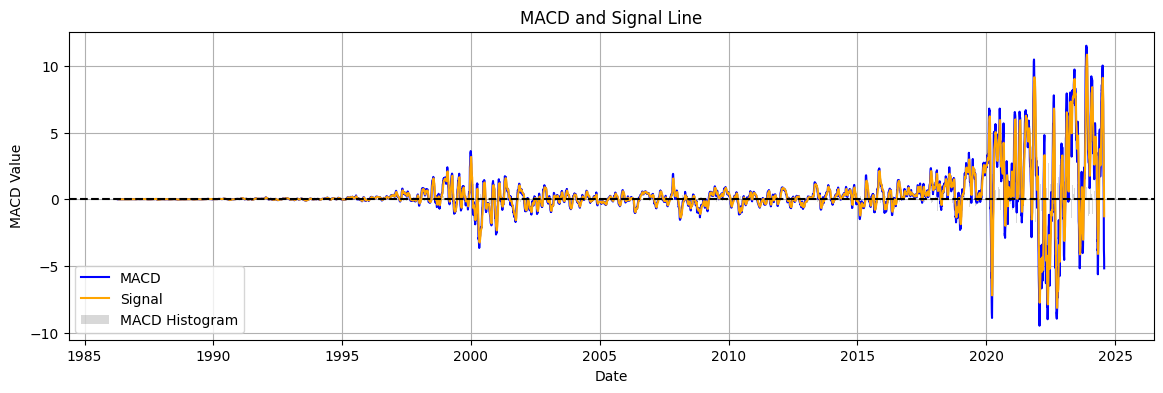

In [6]:
#Plot 3: MACD

plt.figure(figsize=(14, 4))
plt.plot(df["Date"], df["MACD"], label="MACD", color="blue")
plt.plot(df["Date"], df["MACD_Signal"], label="Signal", color="orange")
plt.bar(df["Date"], df["MACD_Diff"], label="MACD Histogram", color="gray", alpha=0.3)
plt.axhline(0, linestyle="--", color="black")
plt.title("MACD and Signal Line")
plt.xlabel("Date")
plt.ylabel("MACD Value")
plt.legend()
plt.grid(True)
plt.show()